# Student performance

## Life cycle of ML project

1.  Understanding problem statement
2.  Data collection
3.  Data checks
4.  Exploratory data analysis
5.  Data pre-processing
6.  Model Training
7.  Choose best model

# 1. Problem statement

### This project understands how the student's performance is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2. Data collection

### Dataset source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### The data consists of 8 columns and 1000 rows.



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the csv data

In [5]:
df = pd.read_csv('data/stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

# Data checks to perform
### 1.  missing values
### 2.  duplicate values
### 3.  data type
### 4.  check the no of unique values
### 5.  check statistics of data set
### 6.  check various categories present in the categorical columns

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

THERE ARE NO MISSING VALUES IN DATASET

In [11]:
df.duplicated().sum()

0

There are no duplicates in the data set

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight
1.  From above description all means are very close to each other - between 66 and 68.05
2.  all standard deviation are also close-between 14.6 and 15.19
3.  while there is a minimum score 0 for math, for writing minimum is much higher =10 and for reading much higher = 17

## Exploring Data

In [19]:
print("categories in gender variable:  ", end = " ")
print(df['gender'].unique())

print("categories in race/ethnicity variable :  ", end = " ")
print(df['race_ethnicity'].unique())

print("categories in parental level of education variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print('categories in lunch variable:  ',end=" ")
print(df['lunch'].unique())

print("categories in test preparation course variable: ",end=" ")
print(df['test_preparation_course'].unique())

categories in gender variable:   ['female' 'male']
categories in race/ethnicity variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable:   ['standard' 'free/reduced']
categories in test preparation course variable:  ['none' 'completed']


## Define numerical & categorical columns

In [21]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features " {}'.format(len(numeric_features), numeric_features))
print('\n we have {} categorical features : {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features " ['math_score', 'reading_score', 'writing_score']

 we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns for total score and average

In [22]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full = df[df['reading_score'] ==100]['average'].count()
writing_full = df[df['writing_score'] ==100]['average'].count()
math_full = df[df['math_score'] ==100]['average'].count()

print(f'number of students with full marks in maths: {math_full}')
print(f'number of students with full marks in reading: {reading_full}')
print(f'number of students with full marks in writing: {writing_full}')



number of students with full marks in maths: 7
number of students with full marks in reading: 17
number of students with full marks in writing: 14


In [30]:
reading_lessthan_20 = df[df['reading_score'] <=20]['average'].count()
writing_lessthan_20 = df[df['writing_score'] <=20]['average'].count()
math_lessthan_20 = df[df['math_score'] <=20]['average'].count()

print(f'number of students with less than 20 marks in maths: {math_lessthan_20}')
print(f'number of students with less than 20 marks in reading: {reading_lessthan_20}')
print(f'number of students with less than 20 marks in writing: {writing_lessthan_20}')

number of students with less than 20 marks in maths: 4
number of students with less than 20 marks in reading: 1
number of students with less than 20 marks in writing: 3


## Data Visualization

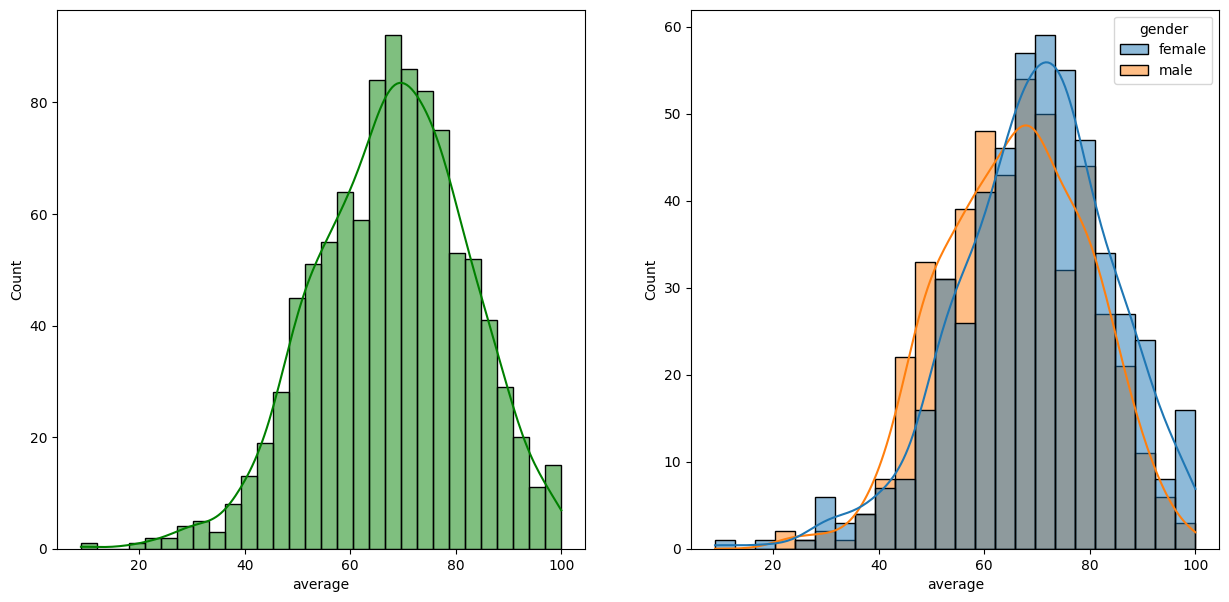

In [35]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

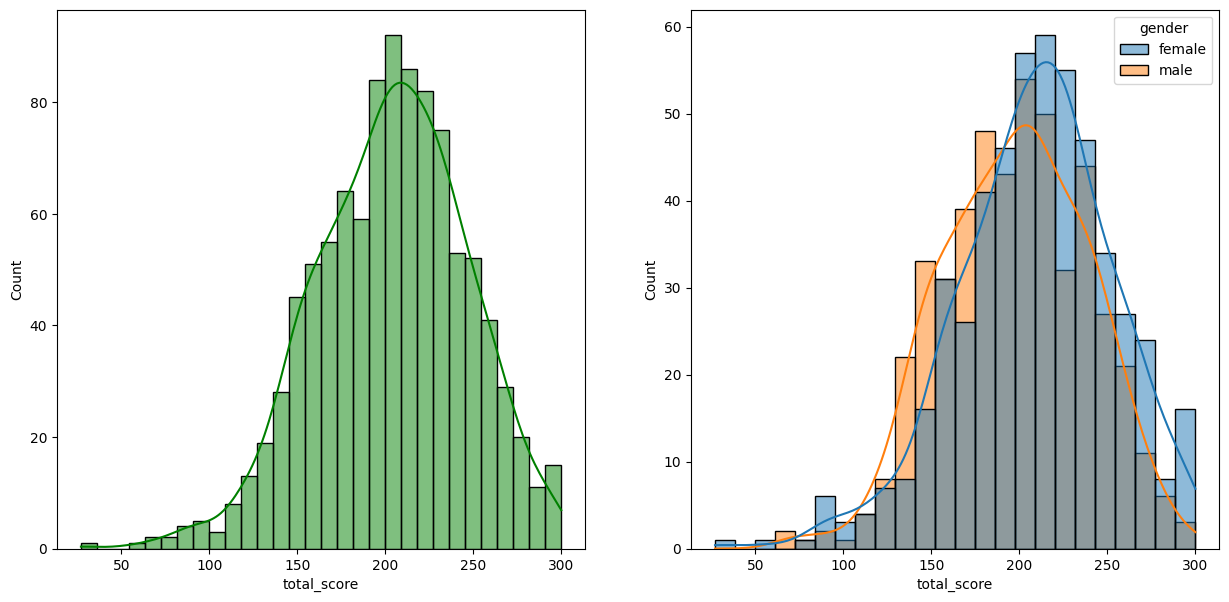

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

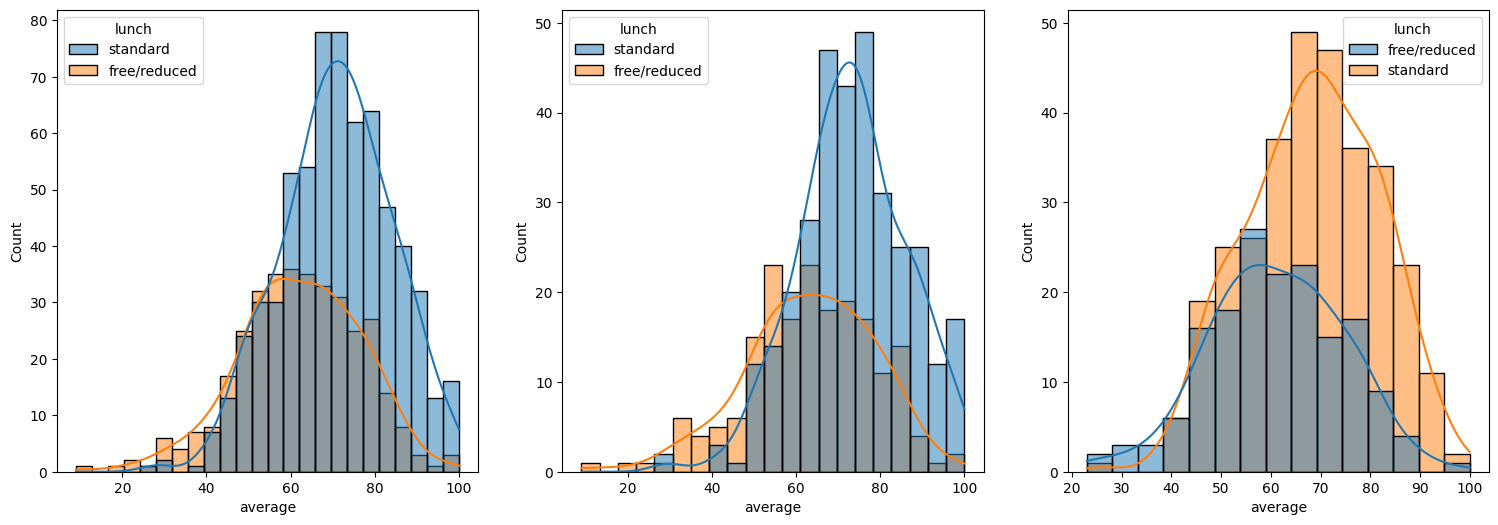

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True,hue='lunch')
plt.show()

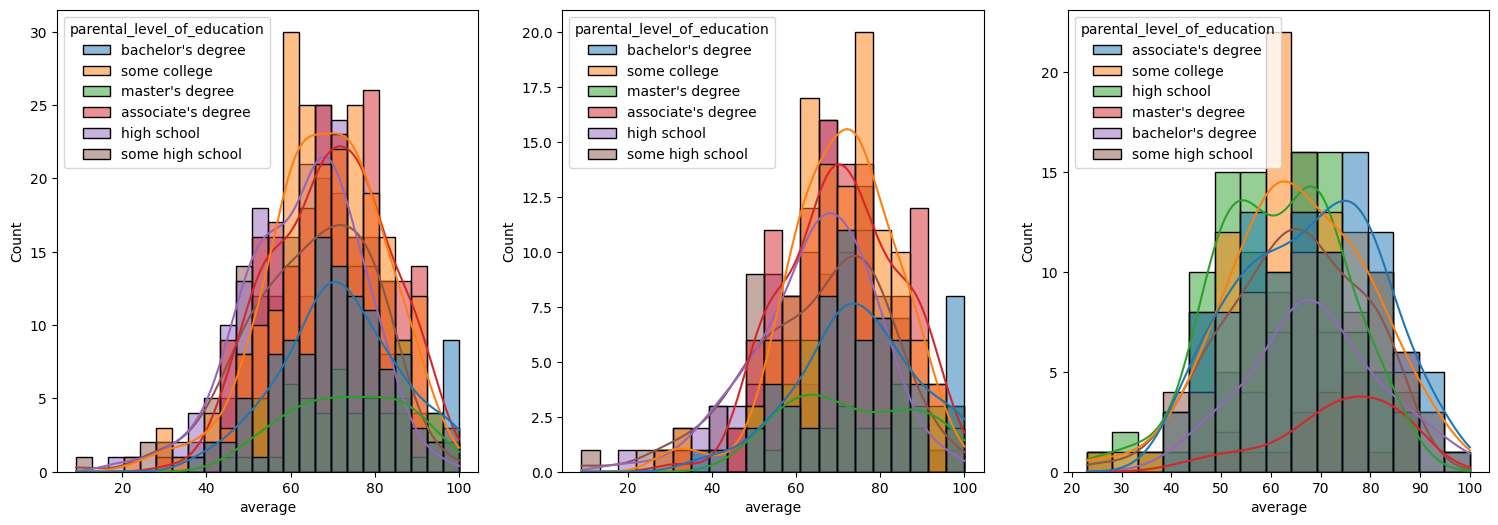

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average',kde=True,hue='parental_level_of_education')
plt.show()

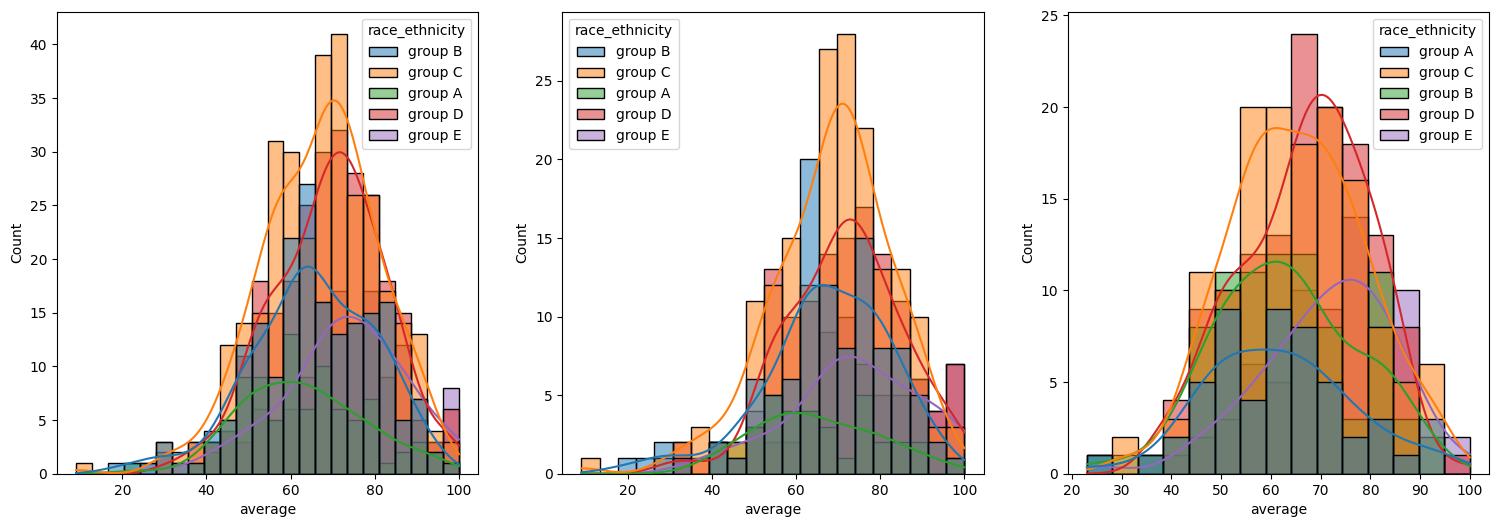

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

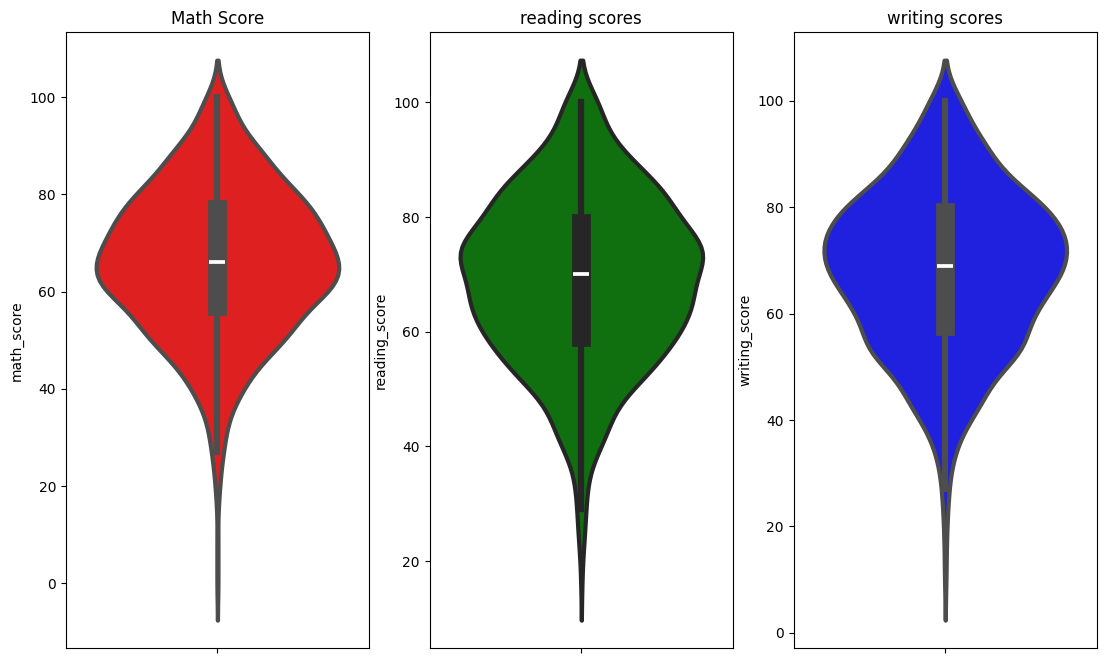

In [42]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Score")
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("reading scores")
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing scores')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## Multivariate Analysis using pieplot

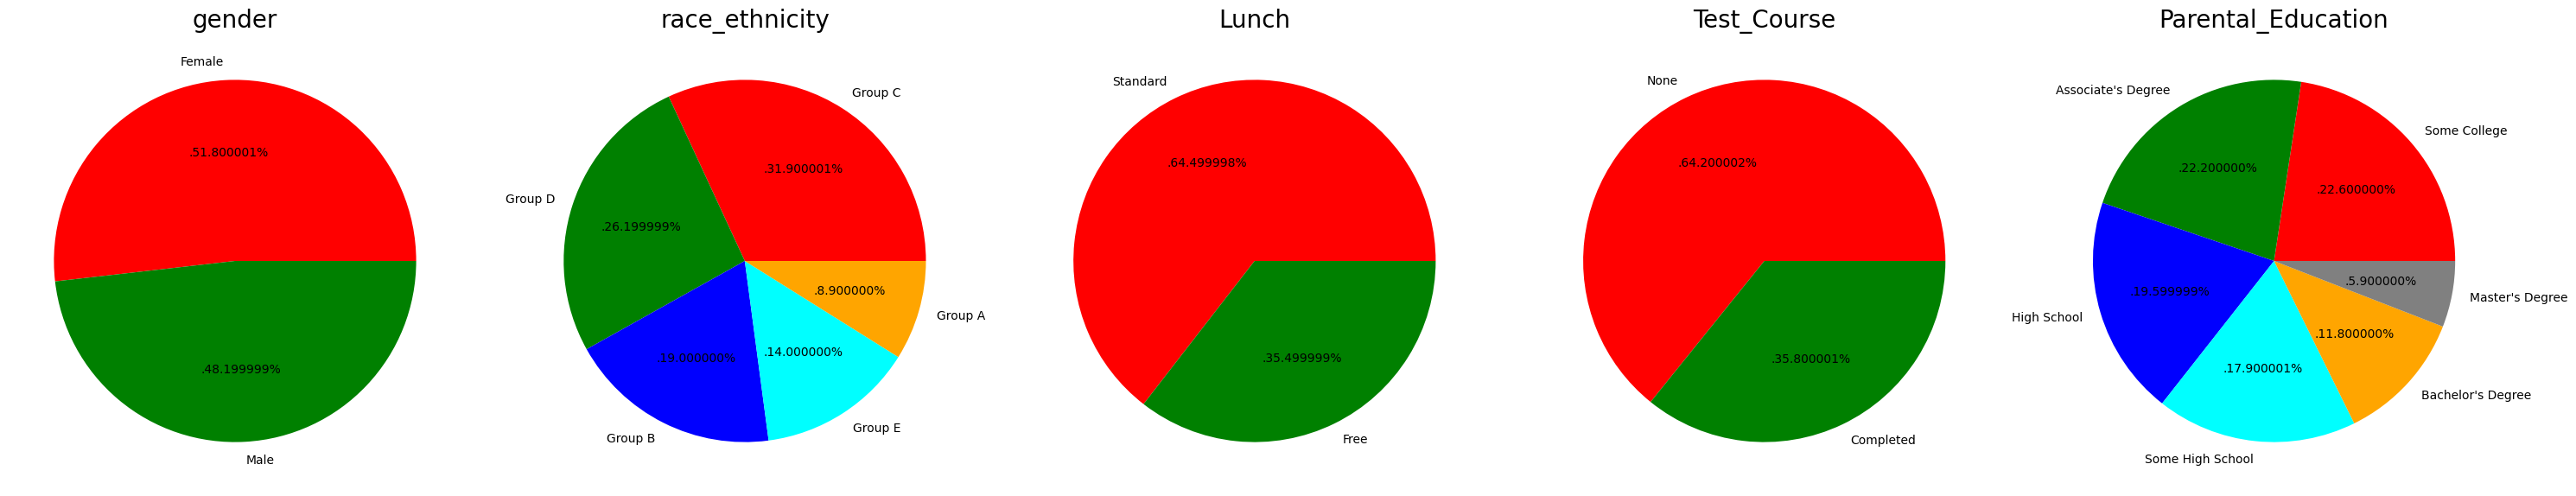

In [45]:
plt.rcParams['figure.figsize'] =(30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['Female','Male']
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title("race_ethnicity",fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


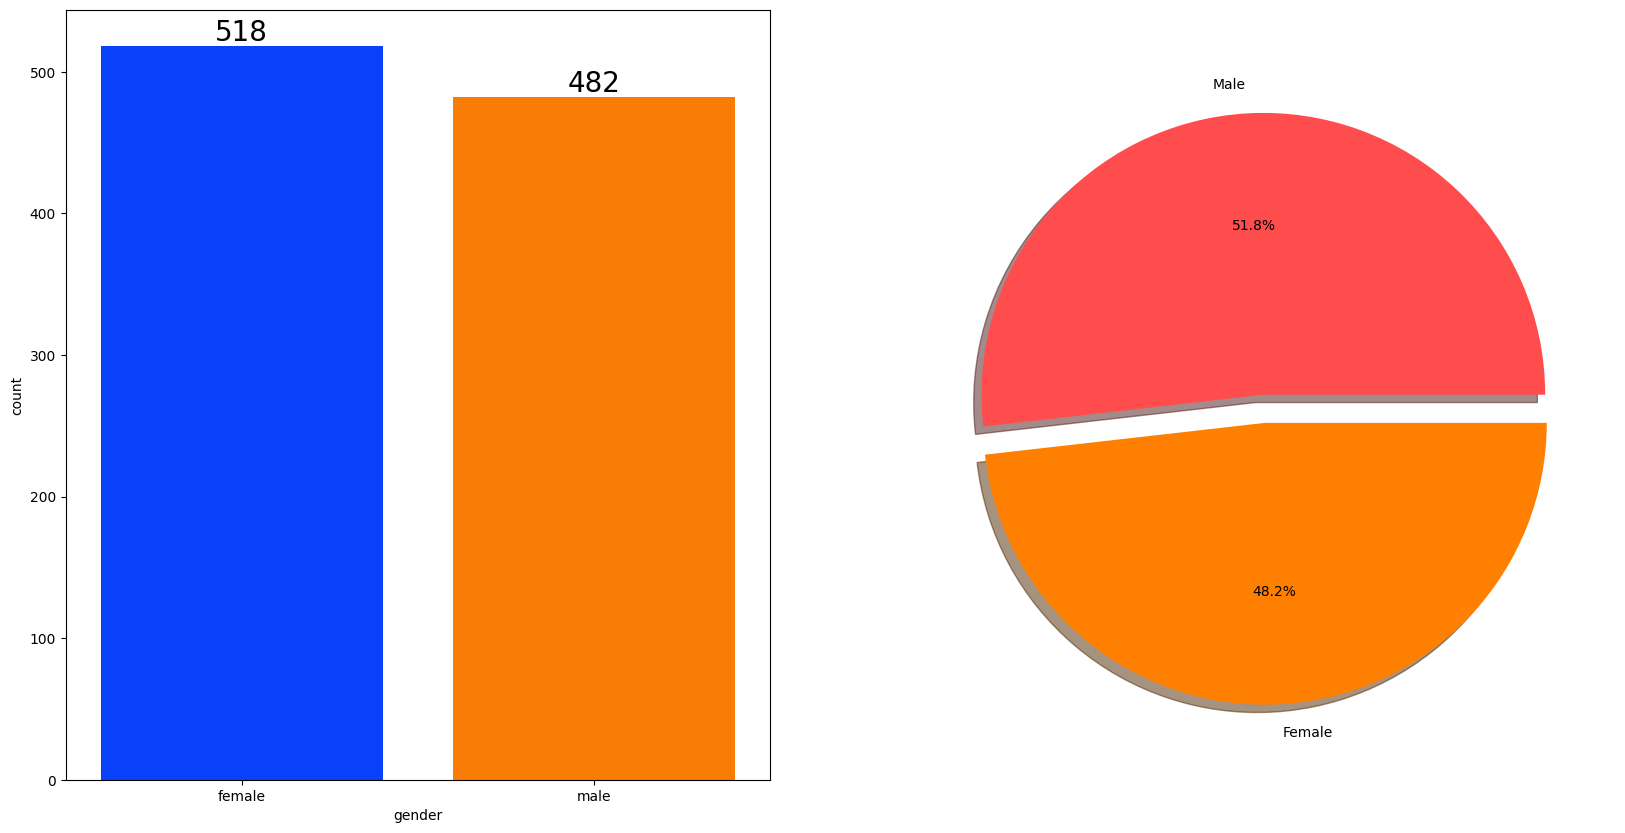

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [51]:
gender_group = df.groupby('gender')
gender_group

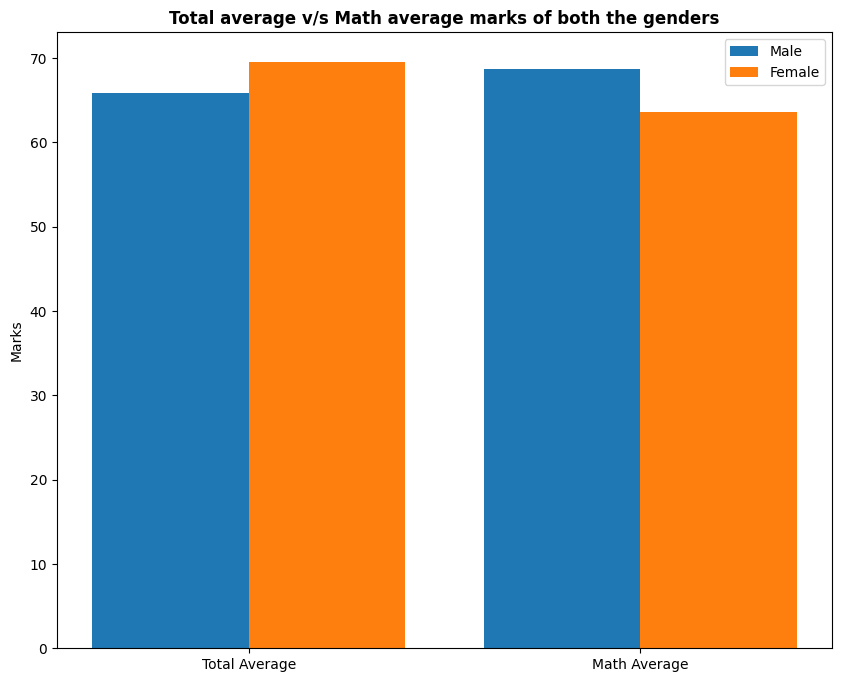

In [53]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'].mean()[0], gender_group['math_score'].mean()[0]]
male_scores = [gender_group['average'].mean()[1], gender_group['math_score'].mean()[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

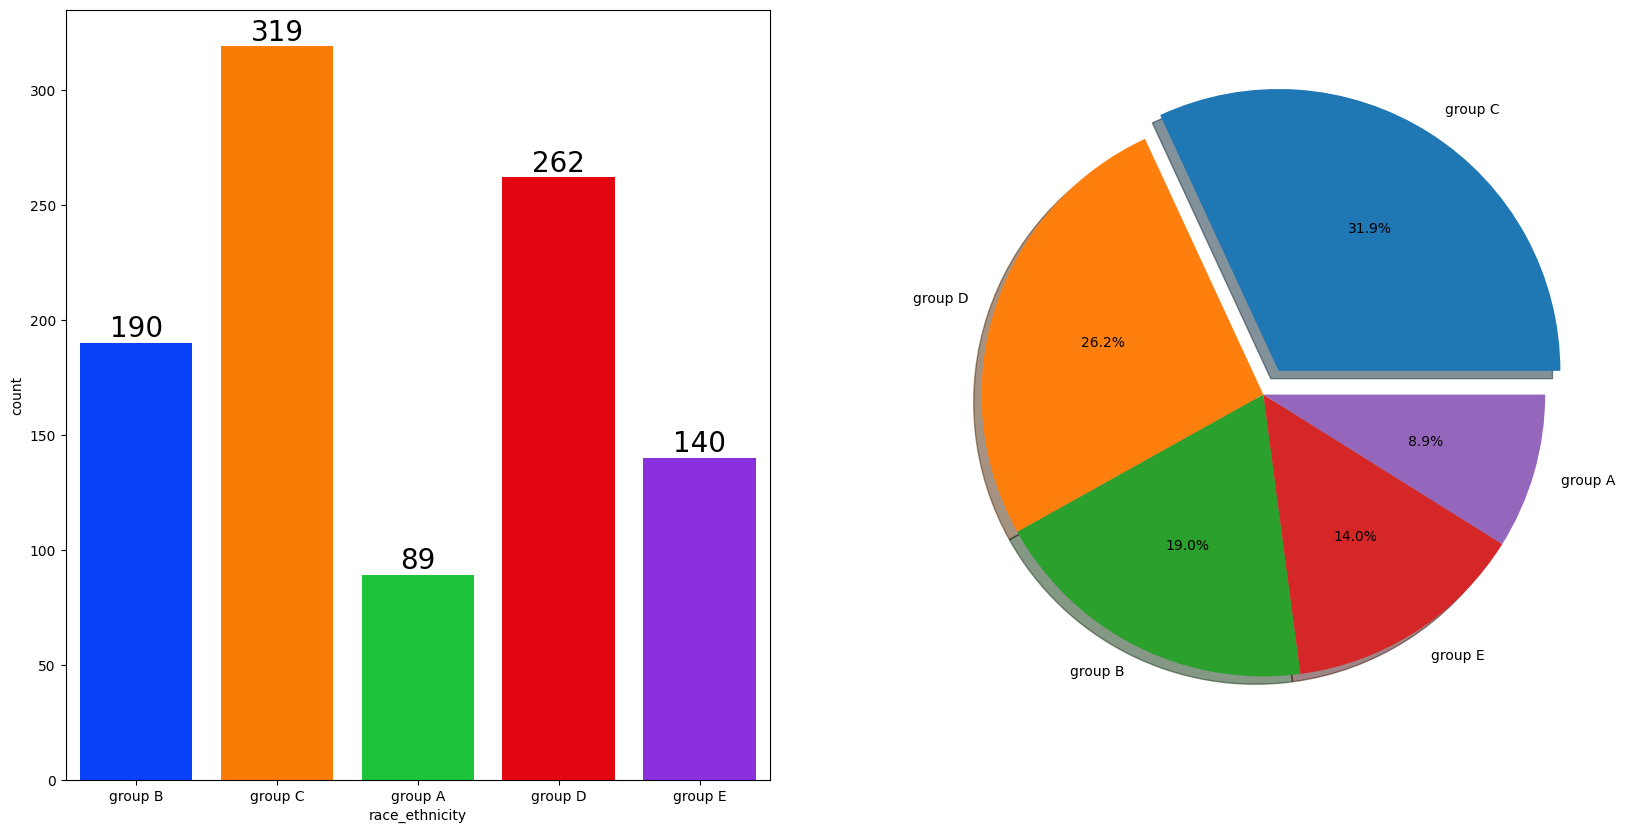

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

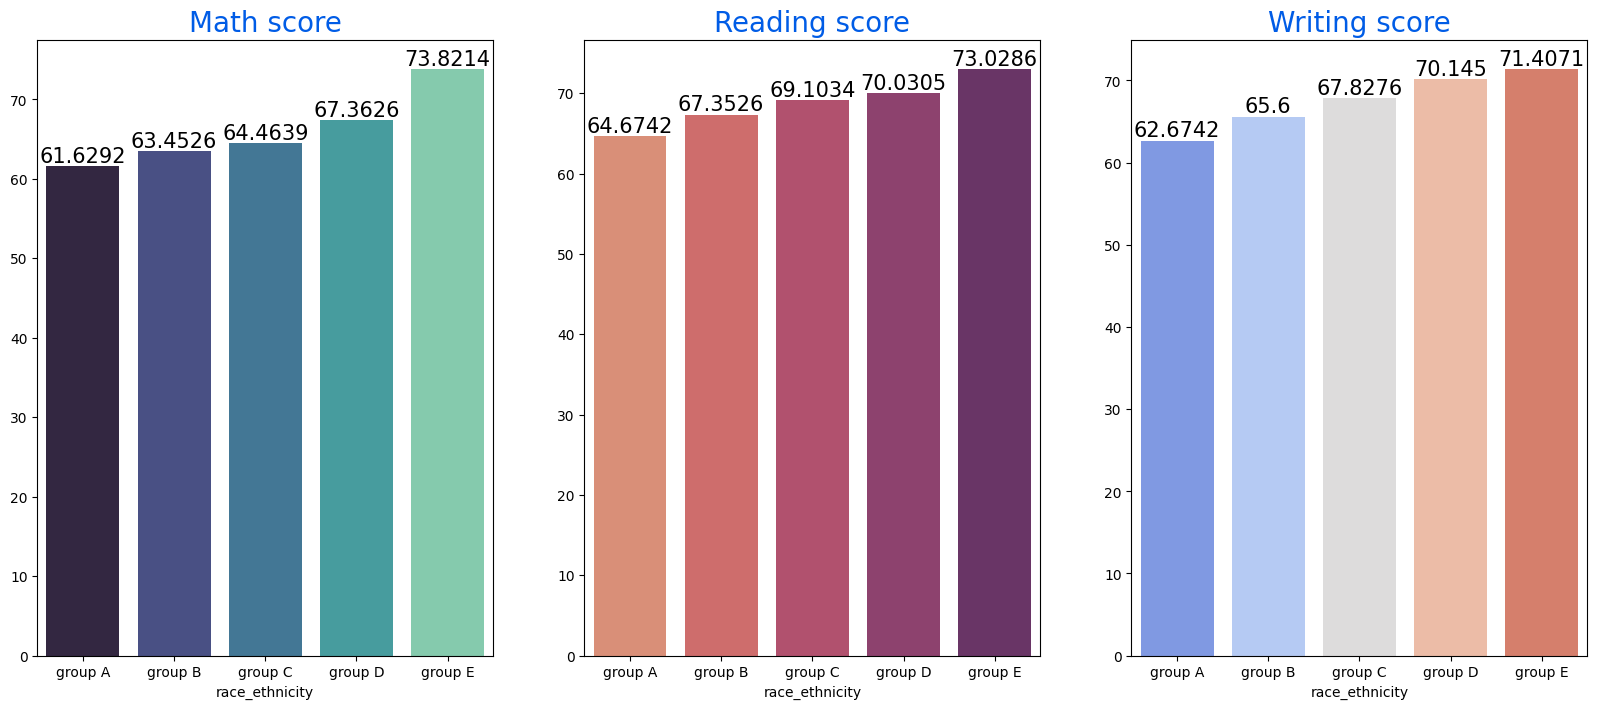

In [56]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

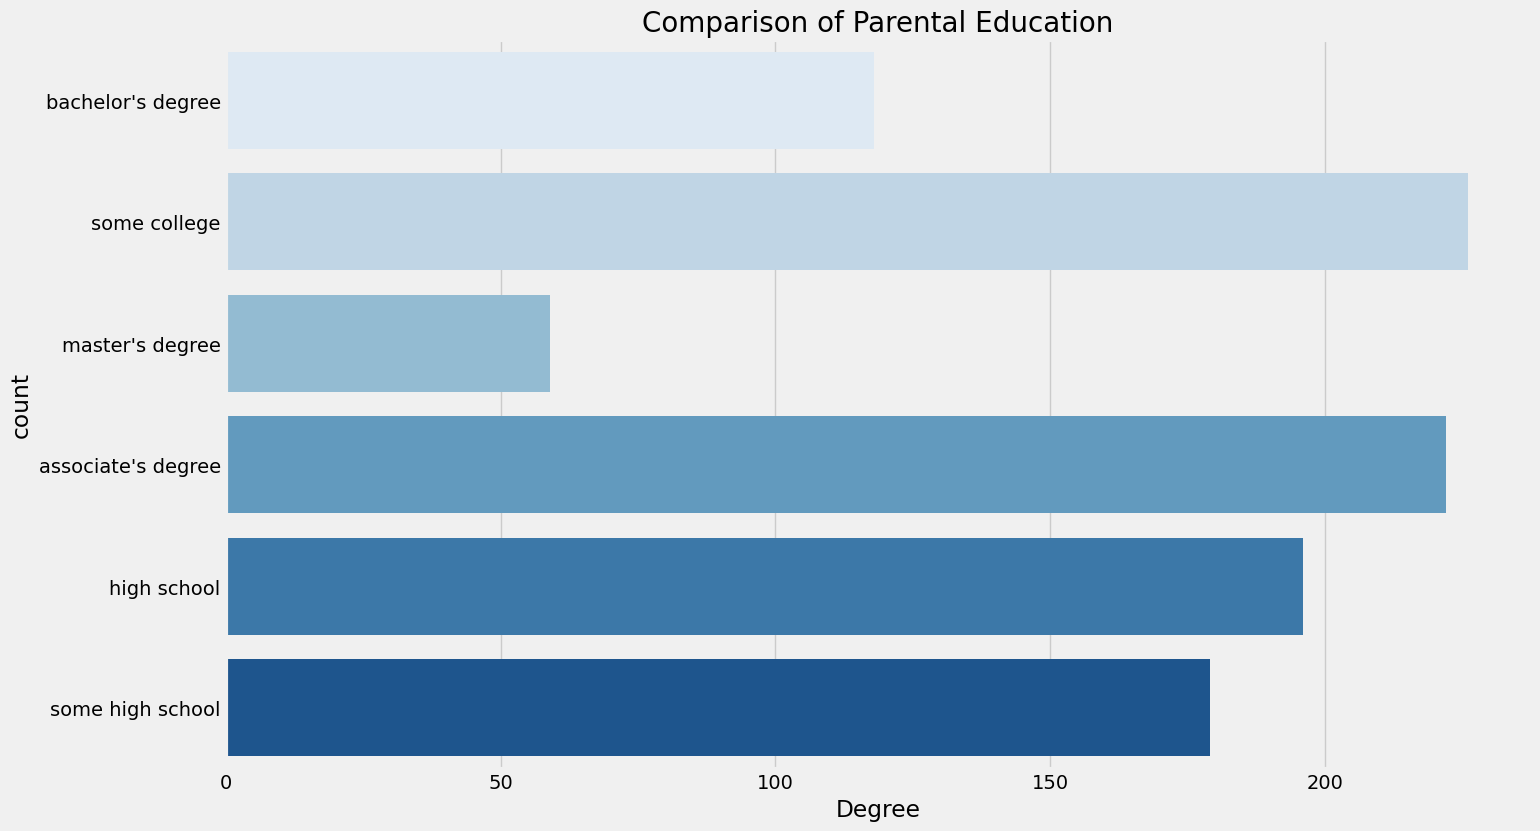

In [57]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

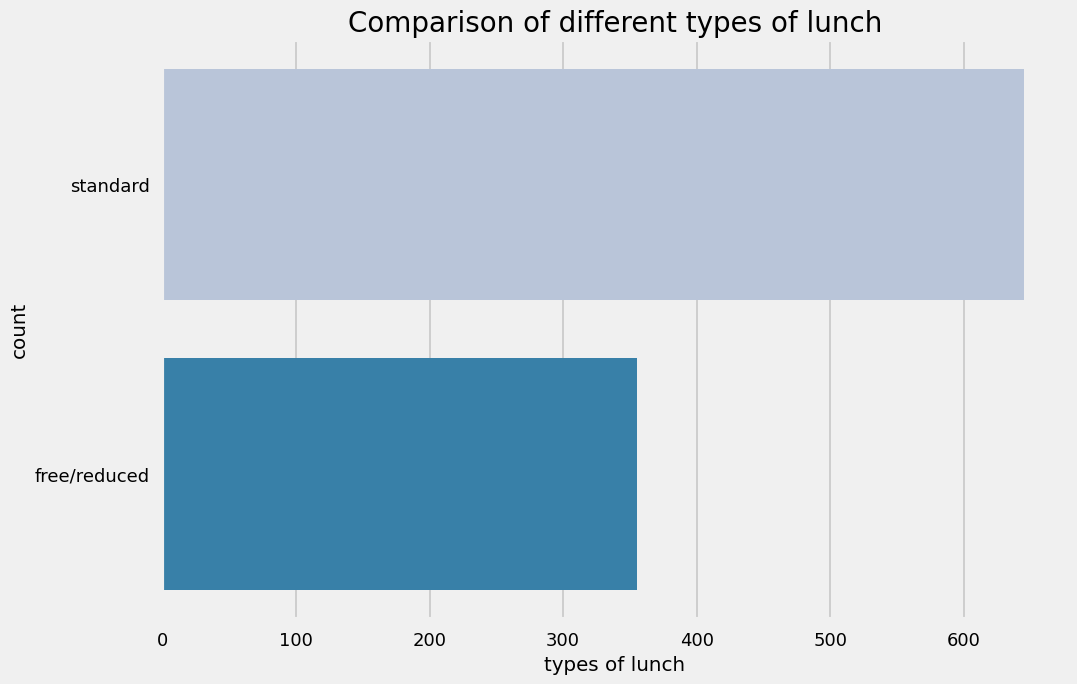

In [59]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

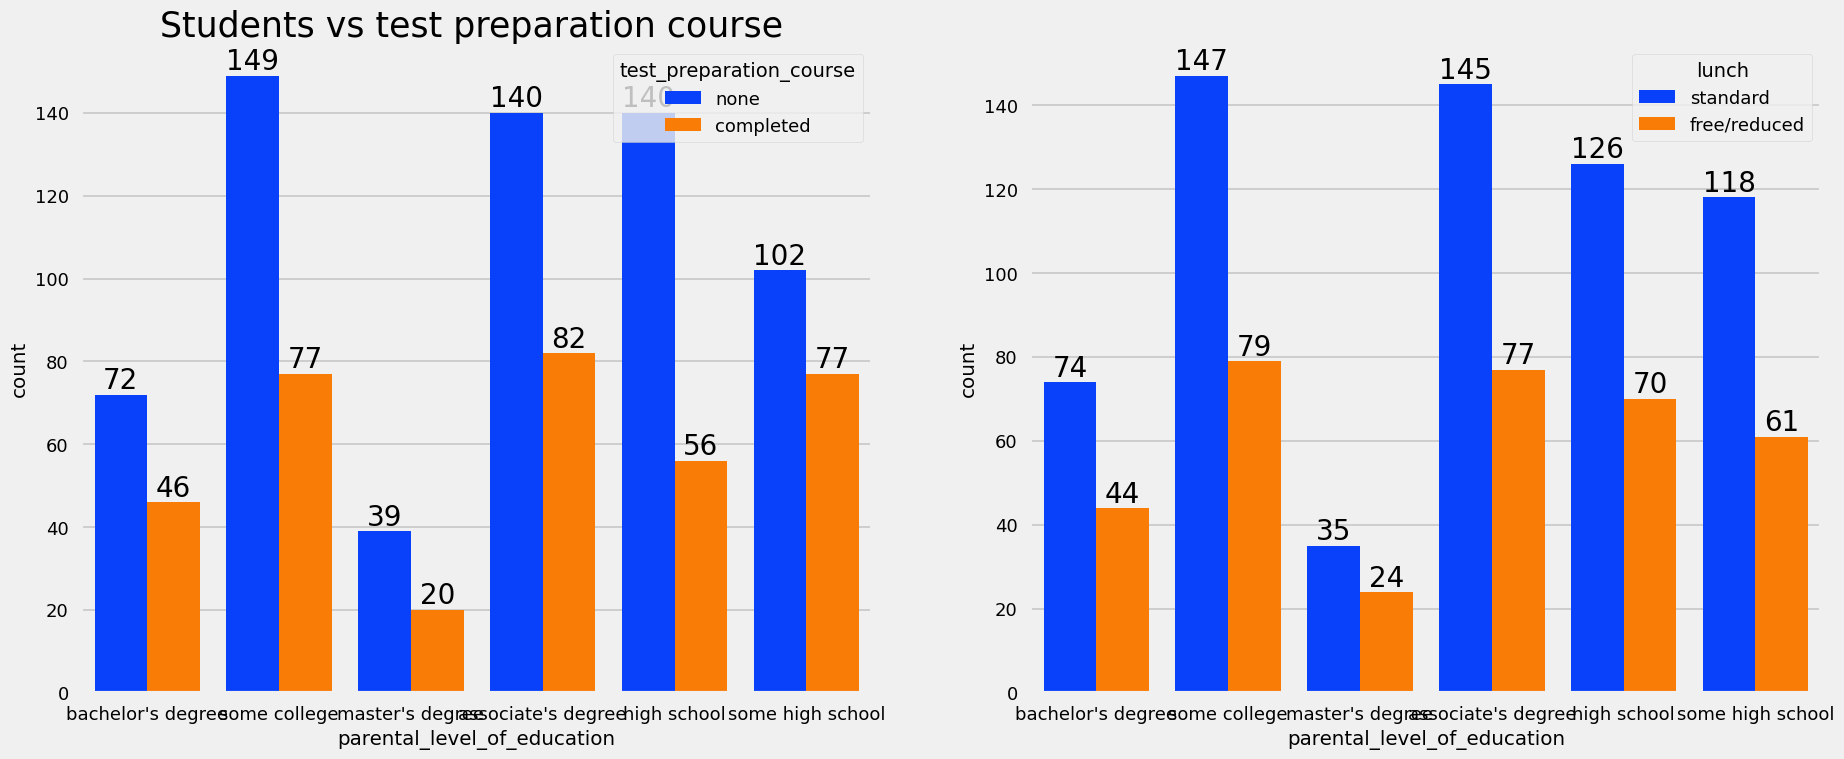

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

<Axes: xlabel='lunch', ylabel='writing_score'>

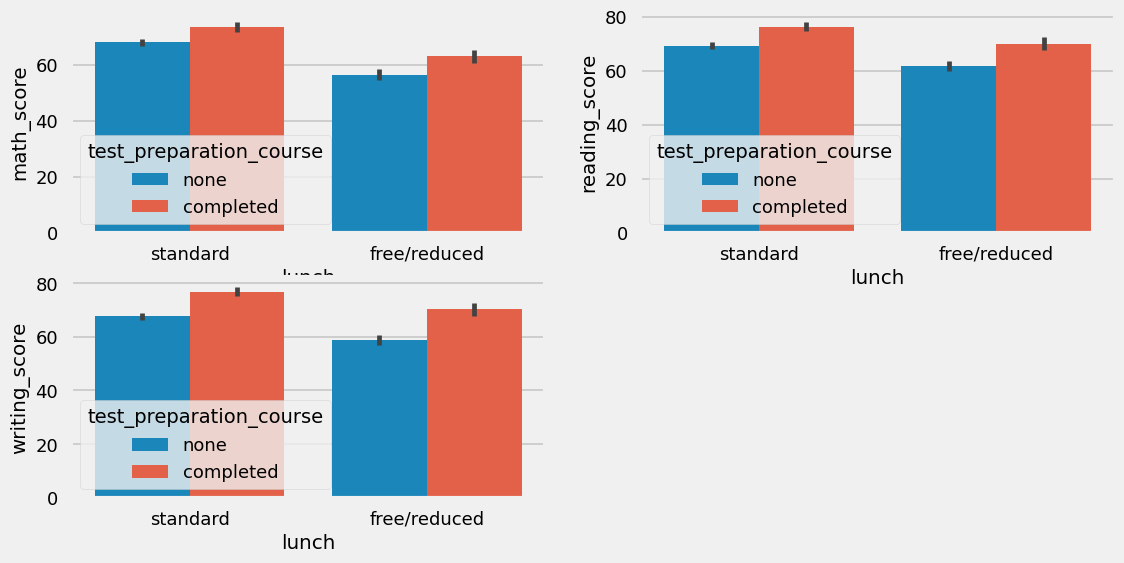

In [62]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

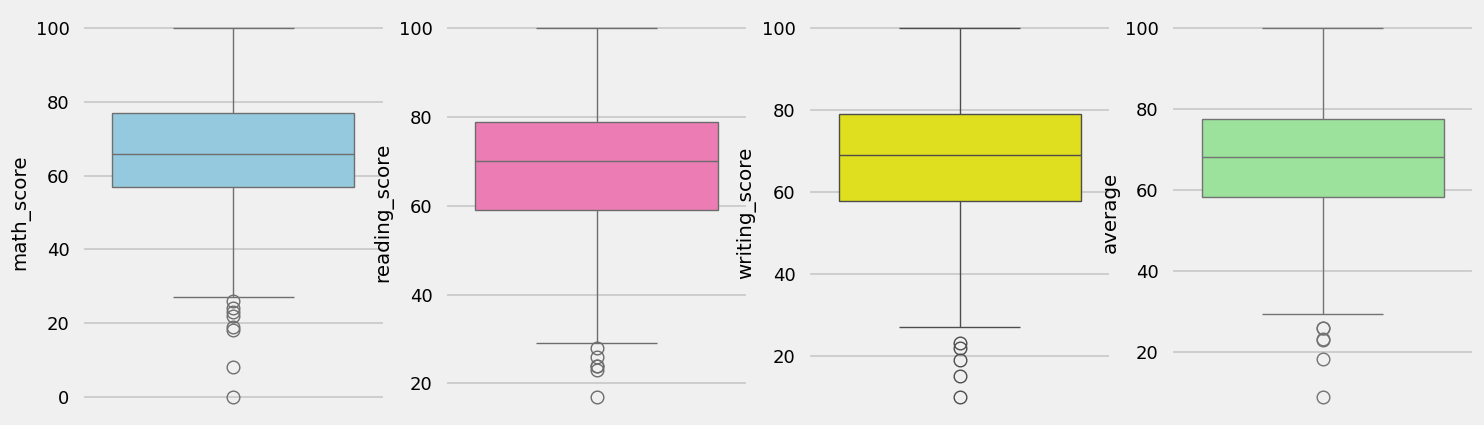

In [63]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

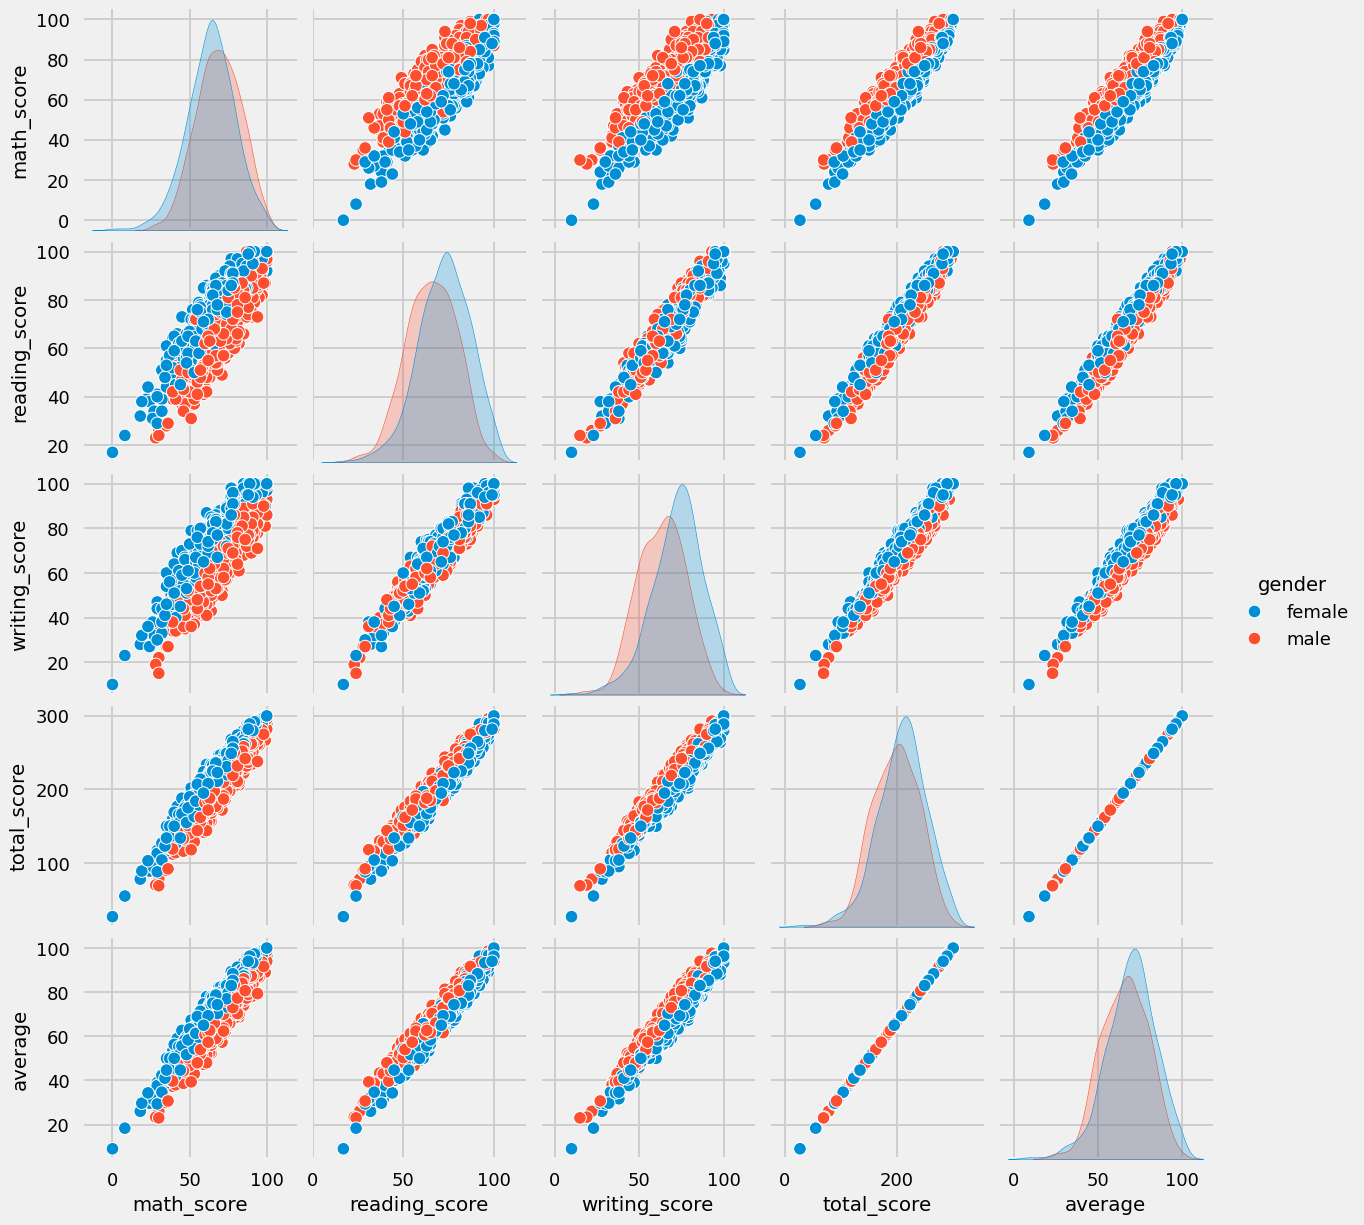

In [64]:
sns.pairplot(df,hue = 'gender')
plt.show()

## CONCLUSION
## 1.   sTUDENTS PERFORMANCE IS RELATED WITH LUNCH,RACE,PARENTAL LEVEL EDUCATION
## 2.   FEMALES LEAD IN PASS PERCENTAGE AND ALSO ARE TOP SCORERS
## 3.   STUDENTS PERFORMANCE IS NOT MUCH RELATED WITH TEST PREPARATION COURSE